In [1]:
import seaborn as sns
import matplotlib as plt

%matplotlib inline
plt.style.use('ggplot')


# Analysis libraries

import os
import re
import random
import numpy as np 
import pandas as pd 

import nltk
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [2]:
# ML Modelling Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, precision_score,recall_score,roc_auc_score
#from sklearn.metrics import accuracy_score, plot_precision_recall_curve

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [3]:
# BERT and Deep Learning Libs
import bert
#import tensorflow_hub as hub
import tensorflow as tf
from keras import layers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.preprocessing.sequence import pad_sequences
#import tensorflow_datasets as tfds

import warnings
warnings.filterwarnings("ignore")

# Dataset Pre Processing and Encoding

In [4]:
ner = pd.read_csv('ner.csv', 
                  encoding= 'ISO-8859-1',
                  error_bad_lines=False)
ner_dataset = pd.read_csv('ner_dataset.csv',
                  encoding='ISO-8859-1',
                  error_bad_lines=False)

Skipping line 281837: expected 25 fields, saw 34



In [5]:
ner.columns


Index(['Unnamed: 0', 'lemma', 'next-lemma', 'next-next-lemma', 'next-next-pos',
       'next-next-shape', 'next-next-word', 'next-pos', 'next-shape',
       'next-word', 'pos', 'prev-iob', 'prev-lemma', 'prev-pos',
       'prev-prev-iob', 'prev-prev-lemma', 'prev-prev-pos', 'prev-prev-shape',
       'prev-prev-word', 'prev-shape', 'prev-word', 'sentence_idx', 'shape',
       'word', 'tag'],
      dtype='object')

In [6]:
np.array((ner['Unnamed: 0']))

array([      0,       1,       2, ..., 1048572, 1048573, 1048574],
      dtype=int64)

In [7]:
ner.head()

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1.0,capitalized,Thousands,O
1,1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,...,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1.0,lowercase,of,O
2,2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,...,thousand,NNS,capitalized,Thousands,lowercase,of,1.0,lowercase,demonstrators,O
3,3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,...,of,IN,lowercase,of,lowercase,demonstrators,1.0,lowercase,have,O
4,4,march,through,london,NNP,capitalized,London,IN,lowercase,through,...,demonstr,NNS,lowercase,demonstrators,lowercase,have,1.0,lowercase,marched,O


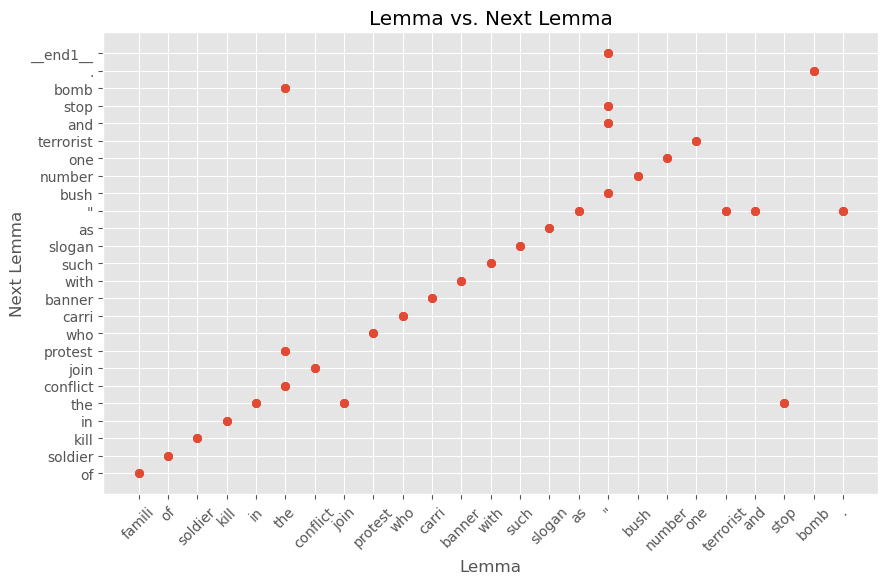

In [8]:
import pandas as pd
import matplotlib.pyplot as plt  # Make sure you import matplotlib.pyplot as plt

# Assuming 'ner' is your DataFrame with all the data

# Select the first 100 rows of your DataFrame
df = ner[ner['sentence_idx']==2]

plt.figure(figsize=(10, 6))
plt.scatter(df['lemma'], df['next-lemma'])
plt.title('Lemma vs. Next Lemma')
plt.xlabel('Lemma')
plt.ylabel('Next Lemma')
plt.xticks(rotation=45)
plt.show()


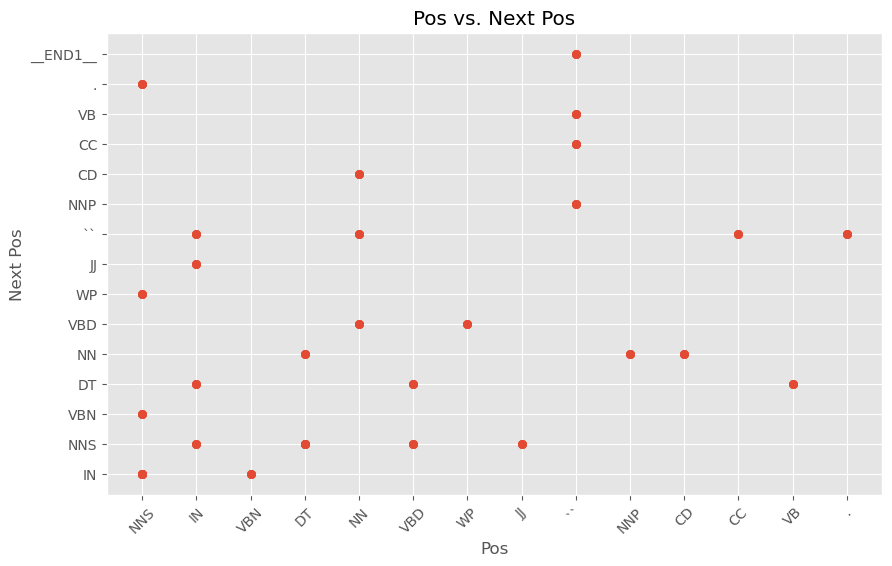

In [9]:
import pandas as pd
import matplotlib.pyplot as plt  # Make sure you import matplotlib.pyplot as plt

# Assuming 'ner' is your DataFrame with all the data

# Select the first 100 rows of your DataFrame
df = ner[ner['sentence_idx']==2]

plt.figure(figsize=(10, 6))
plt.scatter(df['pos'], df['next-pos'])
plt.title('Pos vs. Next Pos')
plt.xlabel('Pos')
plt.ylabel('Next Pos')
plt.xticks(rotation=45)
plt.show()


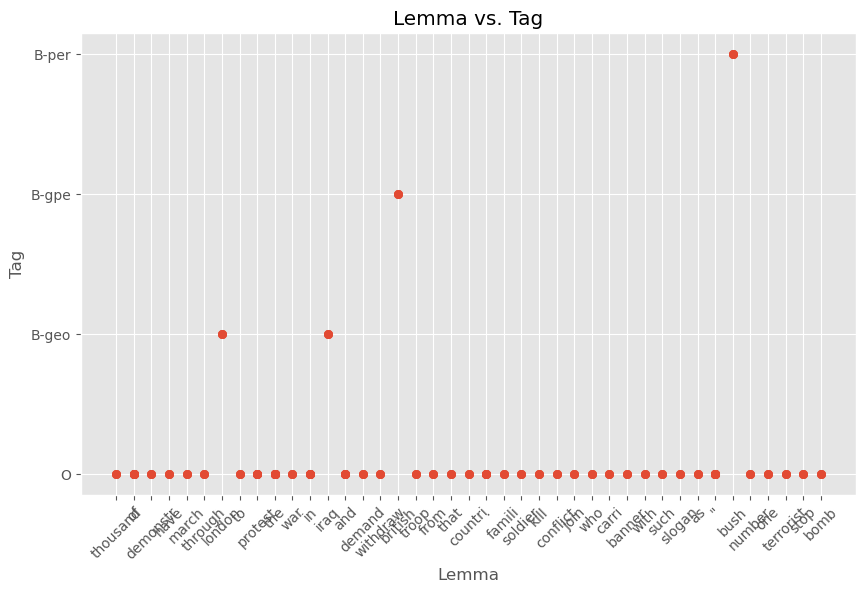

In [10]:
import pandas as pd
import matplotlib.pyplot as plt  # Make sure you import matplotlib.pyplot as plt

# Assuming 'ner' is your DataFrame with all the data

# Select the first 100 rows of your DataFrame
df = ner[ner['sentence_idx']<3]

plt.figure(figsize=(10, 6))
plt.scatter(df['lemma'], df['tag'])
plt.title('Lemma vs. Tag')
plt.xlabel('Lemma')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.show()


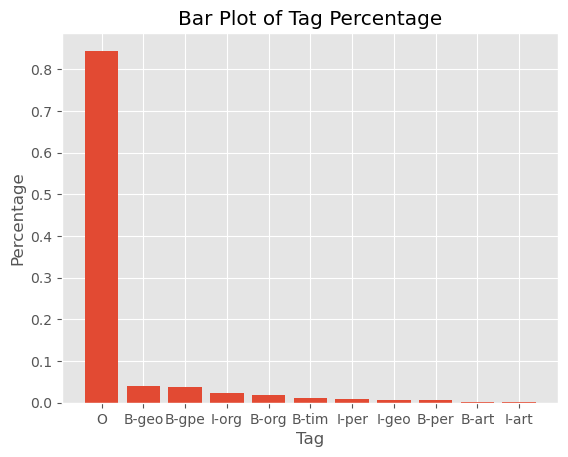

In [11]:
import pandas as pd
import matplotlib.pyplot as plt  # Make sure you import matplotlib.pyplot as plt

# Assuming 'ner' is your DataFrame with all the data

# Select the first 100 rows of your DataFrame
df = ner[ner['sentence_idx']<30]

# Count the occurrences of each tag
tag_counts = df['tag'].value_counts()/len(df)

# Create a bar plot
plt.bar(tag_counts.index, tag_counts.values)

# Add labels and title
plt.xlabel("Tag")
plt.ylabel("Percentage")
plt.title("Bar Plot of Tag Percentage")

# Show the plot
plt.show()

## Utilizing 'lemma','next-lemma','next-pos','prev-pos','word','shape','tag'

In [12]:
Relevent=ner[['Unnamed: 0','sentence_idx','lemma','next-lemma','next-pos','prev-pos','word','shape','tag']]

In [13]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'tag' is the column you want to convert to integer values
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'tag' column and transform it to integer values
Relevent['tag_Encode'] = label_encoder.fit_transform(Relevent['tag']) + 1  # Add 1 to start from 1 instead of 0
Relevent['lemma_Encode'] = label_encoder.fit_transform(Relevent['lemma']) + 1  # Add 1 to start from 1 instead of 0
Relevent['next_lemma_Encode'] = label_encoder.fit_transform(Relevent['next-lemma']) + 1  # Add 1 to start from 1 instead of 0
Relevent['next_pos_Encode'] = label_encoder.fit_transform(Relevent['next-pos']) + 1  # Add 1 to start from 1 instead of 0
Relevent['word_Encode'] = label_encoder.fit_transform(Relevent['word']) + 1  # Add 1 to start from 1 instead of 0
Relevent['shape_Encode'] = label_encoder.fit_transform(Relevent['shape']) + 1  # Add 1 to start from 1 instead of 0
Relevent['prev_pos_Encode'] = label_encoder.fit_transform(Relevent['prev-pos']) + 1  # Add 1 to start from 1 instead of 0

# Now, the 'tag' column contains integer values

In [14]:
train, test = train_test_split(Relevent, test_size=0.2, random_state=42)

In [15]:
train.head()

,Unnamed: 0,sentence_idx,lemma,next-lemma,next-pos,prev-pos,word,shape,tag,tag_Encode,lemma_Encode,next_lemma_Encode,next_pos_Encode,word_Encode,shape_Encode,prev_pos_Encode
606191,324356,14854.0,armada,of,IN,VBG,armada,lowercase,O,17,2869,13231,10,14598,6,33
175591,175591,8027.0,limp,off,RP,CC,limped,lowercase,O,17,11139,13233,28,22071,6,6
95717,95717,4358.0,with,presid,NNP,NNS,with,lowercase,O,17,19813,14395,17,29990,6,19
412280,130445,5956.0,minist,toni,NNP,NNP,Minister,capitalized,O,17,12201,18189,17,8692,3,17
6738,6738,308.0,.,__end1__,__END1__,NN,.,punct,O,17,17,1676,42,22,10,16


In [16]:
test.head()

,Unnamed: 0,sentence_idx,lemma,next-lemma,next-pos,prev-pos,word,shape,tag,tag_Encode,lemma_Encode,next_lemma_Encode,next_pos_Encode,word_Encode,shape_Encode,prev_pos_Encode
88452,88452,4025.0,a,ceasefir,NN,TO,a,lowercase,O,17,1678,4516,16,13618,6,29
71335,71335,3240.0,polic,in,IN,TO,police,lowercase,O,17,14328,9372,10,24451,6,29
687322,405487,18530.0,and,sunni,NNP,NNP,and,lowercase,I-org,14,2523,17482,17,14318,6,17
489331,207496,9506.0,his,nation,NN,IN,his,lowercase,O,17,9066,12687,16,20647,6,10
717381,715161,32686.0,hour,.,.,IN,hours,lowercase,O,17,9201,17,3,20769,6,10


# Now, Building Machine Learning Models

## Linear Regression

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Perform any necessary data preprocessing here

# Define features and target variable
features = ['lemma_Encode','next_lemma_Encode','next_pos_Encode','word_Encode','shape_Encode','prev_pos_Encode']
target = 'tag_Encode'

# Split the data into training and testing sets
X_train=train[features]
y_train=train[target]
X_test=test[features]
y_test=test[target]

#, X_test, y_train, y_test = train_test_split(ner[features], ner[target], test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can now use this model to make predictions on new data

Mean Absolute Error: 1.39519858909413
Mean Squared Error: 6.269000798832918
R-squared: 0.5489513989788175


In [18]:
test['tag_Linear']=y_pred
test['tag_Linear']=test['tag_Linear'].astype(int)

In [19]:
grouped = test.groupby('sentence_idx')
relevance_scores = []
model_rankings = []
baseline_rankings = []

for group_name, group_data in grouped:
    # Sort the group by relevance score (tag) for baseline ranking
    baseline_ranking = group_data.sort_values(by='tag_Encode', ascending=False)['Unnamed: 0'].tolist()
    
    # Sort the group by your model's ranking (if available)
    # Replace 'your_model_ranking_column' with the column that represents model rankings
    model_ranking = group_data.sort_values(by='tag_Linear')['Unnamed: 0'].tolist()
    
    # Get relevance scores (tags) for the group
    relevance_score = group_data['tag_Encode'].tolist()
    
    baseline_rankings.append(baseline_ranking)
    model_rankings.append(model_ranking)
    relevance_scores.append(relevance_score)

# Step 3: Define functions for WIG and NQC
def calculate_wig(relevance_scores, model_rankings, baseline_rankings):
    total_wig = 0
    num_queries = len(relevance_scores)
    
    for i in range(num_queries):
        wig = 0
        for j in range(len(model_rankings[i])):
            model_rank = model_rankings[i][j]
            baseline_rank = baseline_rankings[i][j]
            relevance = relevance_scores[i][j]
            wig += (baseline_rank - model_rank) * relevance
        total_wig += wig
    
    return total_wig / num_queries

def calculate_nqc(model_rankings):
    num_unique_documents = set()
    total_queries = len(model_rankings)
    
    for i in range(total_queries):
        unique_documents = set(model_rankings[i])
        num_unique_documents.update(unique_documents)
    
    return len(num_unique_documents) / total_queries

# Step 4: Calculate WIG and NQC
wig_score = calculate_wig(relevance_scores, model_rankings, baseline_rankings)
nqc_score = calculate_nqc(model_rankings)


# Calculate Quality Factor (QF) for multiple documents or queries
def calculate_qf(relevance_scores_list):
    qf_values = []

    for relevance_scores in relevance_scores_list:
        K = len(relevance_scores)
        qf = 0

        for i in range(K):
            Ri = relevance_scores[i]
            qf += (2 ** Ri - 1) / (i + 1)

        qf_values.append(qf / K)

    return qf_values



# Calculate Cohesion for multiple documents or queries
def calculate_cohesion(relevance_scores_list):
    cohesion_values = []

    for relevance_scores in relevance_scores_list:
        cohesion = sum(relevance_scores)
        cohesion_values.append(cohesion)

    return cohesion_values

# Calculate mean values of QF, AC, and Cohesion
mean_qf = sum(calculate_qf(relevance_scores)) / len(relevance_scores)
mean_cohesion = sum(calculate_cohesion(relevance_scores)) / len(relevance_scores)

# Print the mean values
print(f'Mean Quality Factor (QF): {mean_qf}')
print(f'Mean Cohesion: {mean_cohesion}')
print(f'Weighted Information Gain (WIG): {wig_score}')
print(f'Normalized Query Count (NQC): {nqc_score}')


Mean Quality Factor (QF): 54314.70306477161
Mean Cohesion: 94.88019326466843
Weighted Information Gain (WIG): 0.028642518227057052
Normalized Query Count (NQC): 5.753182502025228


# All Machine Learning Models

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train 7 different models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    test[f'tag_{model_name}'] = y_pred.astype(int)
    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n")

    grouped = test.groupby('sentence_idx')
    relevance_scores = []
    model_rankings = []
    baseline_rankings = []

    for group_name, group_data in grouped:
        # Sort the group by relevance score (tag) for baseline ranking
        baseline_ranking = group_data.sort_values(by='tag_Encode', ascending=False)['Unnamed: 0'].tolist()

        # Sort the group by your model's ranking (if available)
        # Replace 'your_model_ranking_column' with the column that represents model rankings
        model_ranking = group_data.sort_values(by=f'tag_{model_name}')['Unnamed: 0'].tolist()

        # Get relevance scores (tags) for the group
        relevance_score = group_data[f'tag_{model_name}'].tolist()

        baseline_rankings.append(baseline_ranking)
        model_rankings.append(model_ranking)
        relevance_scores.append(relevance_score)
    wig_score = calculate_wig(relevance_scores, model_rankings, baseline_rankings)
    nqc_score = calculate_nqc(model_rankings)
    mean_qf = sum(calculate_qf(relevance_scores)) / len(relevance_scores)
    mean_cohesion = sum(calculate_cohesion(relevance_scores)) / len(relevance_scores)

    # Print the mean values
    print(f'Mean Quality Factor (QF): {mean_qf}')
    print(f'Mean Cohesion: {mean_cohesion}')
    print(f'Weighted Information Gain (WIG): {wig_score}')
    print(f'Normalized Query Count (NQC): {nqc_score}')
    print("\n")

Model: Linear Regression
Mean Absolute Error: 1.39519858909413
Mean Squared Error: 6.269000798832918
R-squared: 0.5489513989788175


Mean Quality Factor (QF): 35863.745981760476
Mean Cohesion: 91.68499016317556
Weighted Information Gain (WIG): 5.452985765536396
Normalized Query Count (NQC): 5.753182502025228


Model: Ridge Regression
Mean Absolute Error: 1.3951986928940854
Mean Squared Error: 6.269000804518696
R-squared: 0.5489513985697312


Mean Quality Factor (QF): 35863.745981760476
Mean Cohesion: 91.68499016317556
Weighted Information Gain (WIG): 5.452985765536396
Normalized Query Count (NQC): 5.753182502025228


Model: Lasso Regression
Mean Absolute Error: 1.5091545842839773
Mean Squared Error: 6.703151323336451
R-squared: 0.517714684709075


Mean Quality Factor (QF): 35053.021749862346
Mean Cohesion: 91.96860895729661
Weighted Information Gain (WIG): 3.8853720634185858
Normalized Query Count (NQC): 5.753182502025228


Model: Random Forest
Mean Absolute Error: 0.2501919241432563
M

## Utilizing 'next-next-lemma','next-next-pos','pos','prev-iob','prev-word'

In [21]:
Relevent=ner[['Unnamed: 0','sentence_idx','next-next-lemma','next-next-pos','pos','prev-iob','prev-word','tag']]

In [22]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'tag' is the column you want to convert to integer values
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'tag' column and transform it to integer values
Relevent['tag_Encode'] = label_encoder.fit_transform(Relevent['tag']) + 1  # Add 1 to start from 1 instead of 0
Relevent['next_next_lemma_Encode'] = label_encoder.fit_transform(Relevent['next-next-lemma']) + 1  # Add 1 to start from 1 instead of 0
Relevent['next_next_pos_Enocde'] = label_encoder.fit_transform(Relevent['next-next-pos']) + 1  # Add 1 to start from 1 instead of 0
Relevent['pos_Encode'] = label_encoder.fit_transform(Relevent['pos']) + 1  # Add 1 to start from 1 instead of 0
Relevent['prev_iob_Encode'] = label_encoder.fit_transform(Relevent['prev-iob']) + 1  # Add 1 to start from 1 instead of 0
Relevent['prev_word_Encode'] = label_encoder.fit_transform(Relevent['prev-word']) + 1  # Add 1 to start from 1 instead of 0

# Now, the 'tag' column contains integer values

In [23]:
features = ['next_next_lemma_Encode','next_next_pos_Enocde','pos_Encode','prev_iob_Encode','prev_word_Encode']
target = 'tag_Encode'
train, test = train_test_split(Relevent, test_size=0.2, random_state=42)
# Split the data into training and testing sets
X_train=train[features]
y_train=train[target]
X_test=test[features]
y_test=test[target]

In [24]:
# Initialize and train 7 different models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    test[f'tag_{model_name}'] = y_pred.astype(int)
    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n")

    grouped = test.groupby('sentence_idx')
    relevance_scores = []
    model_rankings = []
    baseline_rankings = []

    for group_name, group_data in grouped:
        # Sort the group by relevance score (tag) for baseline ranking
        baseline_ranking = group_data.sort_values(by='tag_Encode', ascending=False)['Unnamed: 0'].tolist()

        # Sort the group by your model's ranking (if available)
        # Replace 'your_model_ranking_column' with the column that represents model rankings
        model_ranking = group_data.sort_values(by=f'tag_{model_name}')['Unnamed: 0'].tolist()

        # Get relevance scores (tags) for the group
        relevance_score = group_data[f'tag_{model_name}'].tolist()

        baseline_rankings.append(baseline_ranking)
        model_rankings.append(model_ranking)
        relevance_scores.append(relevance_score)
    wig_score = calculate_wig(relevance_scores, model_rankings, baseline_rankings)
    nqc_score = calculate_nqc(model_rankings)
    mean_qf = sum(calculate_qf(relevance_scores)) / len(relevance_scores)
    mean_cohesion = sum(calculate_cohesion(relevance_scores)) / len(relevance_scores)

    # Print the mean values
    print(f'Mean Quality Factor (QF): {mean_qf}')
    print(f'Mean Cohesion: {mean_cohesion}')
    print(f'Weighted Information Gain (WIG): {wig_score}')
    print(f'Normalized Query Count (NQC): {nqc_score}')
    print("\n")

Model: Linear Regression
Mean Absolute Error: 2.3682981093972773
Mean Squared Error: 13.866206598508429
R-squared: 0.0023397207267435993


Mean Quality Factor (QF): 15904.229934551231
Mean Cohesion: 91.2561914130309
Weighted Information Gain (WIG): -0.06596458743201018
Normalized Query Count (NQC): 5.753182502025228


Model: Ridge Regression
Mean Absolute Error: 2.3682981087153196
Mean Squared Error: 13.866206598479108
R-squared: 0.002339720728853245


Mean Quality Factor (QF): 15904.229934551231
Mean Cohesion: 91.2561914130309
Weighted Information Gain (WIG): -0.06596458743201018
Normalized Query Count (NQC): 5.753182502025228


Model: Lasso Regression
Mean Absolute Error: 2.3637622361694697
Mean Squared Error: 13.887624585911954
R-squared: 0.0007987170540614263


Mean Quality Factor (QF): 15759.87908377763
Mean Cohesion: 91.20385372063419
Weighted Information Gain (WIG): 0.0
Normalized Query Count (NQC): 5.753182502025228


Model: Random Forest
Mean Absolute Error: 0.4558402240375742

## Case 3-  'lemma',' pos',  'shape', 'word', 'tag'

In [25]:
Relevent=ner[['Unnamed: 0','sentence_idx','lemma','pos','shape','word','tag']]

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'tag' is the column you want to convert to integer values
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'tag' column and transform it to integer values
Relevent['tag_Encode'] = label_encoder.fit_transform(Relevent['tag']) + 1  # Add 1 to start from 1 instead of 0
Relevent['lemma_Encode'] = label_encoder.fit_transform(Relevent['lemma']) + 1  # Add 1 to start from 1 instead of 0
Relevent['pos_Enocde'] = label_encoder.fit_transform(Relevent['pos']) + 1  # Add 1 to start from 1 instead of 0
Relevent['shape_Encode'] = label_encoder.fit_transform(Relevent['shape']) + 1  # Add 1 to start from 1 instead of 0
Relevent['word_Encode'] = label_encoder.fit_transform(Relevent['word']) + 1  # Add 1 to start from 1 instead of 0

# Now, the 'tag' column contains integer values

In [27]:
features = ['lemma_Encode','pos_Enocde','shape_Encode','word_Encode']
target = 'tag_Encode'
train, test = train_test_split(Relevent, test_size=0.2, random_state=42)
# Split the data into training and testing sets
X_train=train[features]
y_train=train[target]
X_test=test[features]
y_test=test[target]

In [28]:
# Initialize and train 7 different models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    test[f'tag_{model_name}'] = y_pred.astype(int)
    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n")

    grouped = test.groupby('sentence_idx')
    relevance_scores = []
    model_rankings = []
    baseline_rankings = []

    for group_name, group_data in grouped:
        # Sort the group by relevance score (tag) for baseline ranking
        baseline_ranking = group_data.sort_values(by='tag_Encode', ascending=False)['Unnamed: 0'].tolist()

        # Sort the group by your model's ranking (if available)
        # Replace 'your_model_ranking_column' with the column that represents model rankings
        model_ranking = group_data.sort_values(by=f'tag_{model_name}')['Unnamed: 0'].tolist()

        # Get relevance scores (tags) for the group
        relevance_score = group_data[f'tag_{model_name}'].tolist()

        baseline_rankings.append(baseline_ranking)
        model_rankings.append(model_ranking)
        relevance_scores.append(relevance_score)
    wig_score = calculate_wig(relevance_scores, model_rankings, baseline_rankings)
    nqc_score = calculate_nqc(model_rankings)
    mean_qf = sum(calculate_qf(relevance_scores)) / len(relevance_scores)
    mean_cohesion = sum(calculate_cohesion(relevance_scores)) / len(relevance_scores)

    # Print the mean values
    print(f'Mean Quality Factor (QF): {mean_qf}')
    print(f'Mean Cohesion: {mean_cohesion}')
    print(f'Weighted Information Gain (WIG): {wig_score}')
    print(f'Normalized Query Count (NQC): {nqc_score}')
    print("\n")

Model: Linear Regression
Mean Absolute Error: 1.1880849056774365
Mean Squared Error: 6.598930450607118
R-squared: 0.5252132766458513


Mean Quality Factor (QF): 32008.219232178675
Mean Cohesion: 91.233508853142
Weighted Information Gain (WIG): 7.220923504224048
Normalized Query Count (NQC): 5.753182502025228


Model: Ridge Regression
Mean Absolute Error: 1.1880850220647916
Mean Squared Error: 6.598930454629968
R-squared: 0.525213276356411


Mean Quality Factor (QF): 32008.219232178675
Mean Cohesion: 91.233508853142
Weighted Information Gain (WIG): 7.220923504224048
Normalized Query Count (NQC): 5.753182502025228


Model: Lasso Regression
Mean Absolute Error: 1.4338076664285078
Mean Squared Error: 7.004473436477795
R-squared: 0.4960348473712888


Mean Quality Factor (QF): 33381.660506244494
Mean Cohesion: 91.87403078347414
Weighted Information Gain (WIG): 5.517793079504687
Normalized Query Count (NQC): 5.753182502025228


Model: Random Forest
Mean Absolute Error: 0.37173453761506603
Mea